## Comparing DLC Camera CSV 3D coordinate Data to Autobender/Rotary Encoder

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from config import path_to_repository
from analysis import DLC3DBendAngles
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [97]:
#load rotary encoder csv, camera 3d data form DLC csv, and flir_data.mat with timestamps from python camera acquisition
trial_string = "37_05"

renc = os.path.join(path_to_repository , f'/Volumes/ExtremeSSD/SNEL/camera_data/experimental_data_2025_08_20_20_06_02/sensor_data/2025_08_20_18_{trial_string}/data_rotenc_2025_08_20_18_{trial_string}.csv')
df_renc = pd.read_csv(renc)  
# cam = os.path.join(path_to_repository , '/Volumes/ExtremeSSD/SNEL/camera_data/8.22 calib/videos_and_analyzed_3D/2025_08_20_18_24_57_DLC_3D.csv')
cam = os.path.join(path_to_repository , f'/Volumes/ExtremeSSD/SNEL/camera_data/8.22 calib/videos_and_analyzed_3D/MATLAB Triangulation/new_converted_triangulated_3D_points_{trial_string}.csv')
cam_timestamp = os.path.join(
    path_to_repository,
    f'/Volumes/ExtremeSSD/SNEL/camera_data/trials 8.20/2025_08_20_18_{trial_string}/flir_data.mat'
)



In [98]:
#load DLC 3d coordinates from DLC triangulation
cam = DLC3DBendAngles(cam)

# Load only variables starting with 'ts' -> timestamp data
df_ts = cam.load_mat_as_df(cam_timestamp, prefix="ts")

In [99]:
#check number of rows from  cam dataframe (taken from DLC csv) and df_ts dataframe (timestamps form flir_data.mat file).  They hopefully are the same.  If not, need to determine which frames dropped.
rows_renc, rows_cam = DLC3DBendAngles.compare_row_counts(cam.df, df_ts)

DataFrame 1: 199 rows
DataFrame 2: 199 rows


In [100]:
#add camera timestamp columns to 3d dlc data
cam.add_dataframe(df_ts)

scorer     DLC_3D                                               \
    bodyparts        PIP                               MCP              
       coords          x          y           z          x          y   
0           0        NaN        NaN         NaN -14.211303 -25.045929   
1           1        NaN        NaN         NaN -14.264890 -25.083250   
2           2 -56.100966 -38.319792  208.041883 -14.097394 -24.976217   
3           3 -56.106383 -38.250417  208.044584 -14.090106 -24.976376   
4           4 -56.089190 -38.149814  208.139745 -14.087946 -25.030933   
..        ...        ...        ...         ...        ...        ...   
194       194 -57.290142 -39.759564  208.494445 -15.360416 -26.125422   
195       195 -57.344342 -39.806411  208.596606 -15.438878 -26.199116   
196       196 -57.295183 -39.930109  208.374085 -15.392524 -26.230686   
197       197 -57.221892 -39.682812  208.506042 -15.303029 -25.978801   
198       198 -57.165121 -39.667230  208.400597 -15.238428 -25.947520   

                                                                         \
                     hand                        radius_styloid_process   
              z         x          y           z                      x   
0    223.089256 -1.135550 -19.686764  227.539939              49.256367   
1    223.105640 -1.216009 -19.760697  227.525510              49.183183   
2    223.136606 -0.983569 -19.608980  227.569830              49.436433   
3    223.091225 -0.959067 -19.578975  227.509524              49.442946   
4    223.018604 -0.931776 -19.523596  227.528141              49.478903   
..          ...       ...        ...         ...                    ...   
194  223.048980 -2.322257 -20.477405  227.456798              47.968667   
195  223.063828 -2.400470 -20.542915  227.501365              47.926570   
196  222.982048 -2.379879 -20.617186  227.371424              47.961692   
197  223.132879 -2.255357 -20.385384  227.438814              48.025273   
198  223.089658 -2.190080 -20.392521  227.354043              48.089222   

                                                             ts_25183199  \
                             forearm                                       
            y           z          x         y           z                 
0   -8.205395  224.613985  86.626535  3.879564  231.295143  183711125116   
1   -8.336508  224.614815  86.514987  3.540947  231.266235  183711173552   
2   -8.222439  224.730262  86.756038  3.633679  231.380785  183711226773   
3   -8.214810  224.688987  86.914360  3.776216  231.506675  183711277172   
4   -8.164095  224.693425  86.946188  3.833138  231.524754  183711324910   
..        ...         ...        ...       ...         ...           ...   
194 -8.811523  224.012746  85.330721  3.438371  230.255419  183720904685   
195 -8.966108  224.105062  85.091059  3.171857  230.186706  183720951743   
196 -8.976868  224.007489  85.280187  3.285432  230.290732  183721012779   
197 -8.669406  224.043278  85.368197  3.556390  230.363461  183721052240   
198 -8.557952  223.963645  85.382698  3.675112  230.182725  183721105458   

      ts_25185174  
                   
                   
0    183711132531  
1    183711184545  
2    183711236200  
3    183711286935  
4    183711332506  
..            ...  
194  183720914406  
195  183720959919  
196  183721020263  
197  183721059501  
198  183721112448  

[199 rows x 18 columns]

## Bend Angle obtained from Dot Product Formula

## $\theta = \cos^{-1} \left( \frac{\mathbf{v}_1 \cdot \mathbf{v}_2}{\|\mathbf{v}_1\| \, \|\mathbf{v}_2\|} \right)$

As an example:  

V1 is vector from hand to MCP (vector obtained from subtracting 2 xyz points from triangulated DLC csv data)

V2 is vector from MCP to PIP (vector obtained from subtracting 2 xyz points from triangulated DLC csv data)


In [101]:
#Calculte bend angles from DLC 3d trianglulated data

# --- MCP bend ---
hand_pts = cam.get_points("hand")
mcp_pts  = cam.get_points("MCP")
pip_pts  = cam.get_points("PIP")

v1_mcp = cam.vector(hand_pts, mcp_pts)  # hand→MCP
v2_mcp = cam.vector(mcp_pts, pip_pts)   # MCP→PIP
angles_mcp = cam.angle_from_vectors(v1_mcp, v2_mcp)

# --- Wrist angle ---
forearm_pts = cam.get_points("forearm")
hand_pts = cam.get_points("hand")
mcp_pts = cam.get_points("MCP")

v1_wrist = cam.vector(forearm_pts, hand_pts)  # forearm→hand
v2_wrist = cam.vector(hand_pts, mcp_pts)      # hand→MCP
angles_wrist = cam.angle_from_vectors(v1_wrist, v2_wrist)

# --- Add both angles to a copy of the DataFrame ---
df_out = cam.df.copy()
df_out[("metric", "mcp_bend_deg", "deg")]   = angles_mcp
df_out[("metric", "wrist_bend_deg", "deg")] = angles_wrist

cam.add_dataframe(df_out)



scorer     DLC_3D                                               \
    bodyparts        PIP                               MCP              
       coords          x          y           z          x          y   
0           0        NaN        NaN         NaN -14.211303 -25.045929   
1           1        NaN        NaN         NaN -14.264890 -25.083250   
2           2 -56.100966 -38.319792  208.041883 -14.097394 -24.976217   
3           3 -56.106383 -38.250417  208.044584 -14.090106 -24.976376   
4           4 -56.089190 -38.149814  208.139745 -14.087946 -25.030933   
..        ...        ...        ...         ...        ...        ...   
194       194 -57.290142 -39.759564  208.494445 -15.360416 -26.125422   
195       195 -57.344342 -39.806411  208.596606 -15.438878 -26.199116   
196       196 -57.295183 -39.930109  208.374085 -15.392524 -26.230686   
197       197 -57.221892 -39.682812  208.506042 -15.303029 -25.978801   
198       198 -57.165121 -39.667230  208.400597 -15.238428 -25.947520   

                                                                         \
                     hand                        radius_styloid_process   
              z         x          y           z                      x   
0    223.089256 -1.135550 -19.686764  227.539939              49.256367   
1    223.105640 -1.216009 -19.760697  227.525510              49.183183   
2    223.136606 -0.983569 -19.608980  227.569830              49.436433   
3    223.091225 -0.959067 -19.578975  227.509524              49.442946   
4    223.018604 -0.931776 -19.523596  227.528141              49.478903   
..          ...       ...        ...         ...                    ...   
194  223.048980 -2.322257 -20.477405  227.456798              47.968667   
195  223.063828 -2.400470 -20.542915  227.501365              47.926570   
196  222.982048 -2.379879 -20.617186  227.371424              47.961692   
197  223.132879 -2.255357 -20.385384  227.438814              48.025273   
198  223.089658 -2.190080 -20.392521  227.354043              48.089222   

                                                             ts_25183199  \
                             forearm                                       
            y           z          x         y           z                 
0   -8.205395  224.613985  86.626535  3.879564  231.295143  183711125116   
1   -8.336508  224.614815  86.514987  3.540947  231.266235  183711173552   
2   -8.222439  224.730262  86.756038  3.633679  231.380785  183711226773   
3   -8.214810  224.688987  86.914360  3.776216  231.506675  183711277172   
4   -8.164095  224.693425  86.946188  3.833138  231.524754  183711324910   
..        ...         ...        ...       ...         ...           ...   
194 -8.811523  224.012746  85.330721  3.438371  230.255419  183720904685   
195 -8.966108  224.105062  85.091059  3.171857  230.186706  183720951743   
196 -8.976868  224.007489  85.280187  3.285432  230.290732  183721012779   
197 -8.669406  224.043278  85.368197  3.556390  230.363461  183721052240   
198 -8.557952  223.963645  85.382698  3.675112  230.182725  183721105458   

      ts_25185174       metric                 
                  mcp_bend_deg wrist_bend_deg  
                           deg            deg  
0    183711132531          NaN      16.710271  
1    183711184545          NaN      16.679636  
2    183711236200     4.663110      16.648860  
3    183711286935     4.835334      16.487172  
4    183711332506     5.227449      16.880844  
..            ...          ...            ...  
194  183720914406     5.253924      17.426409  
195  183720959919     5.268915      17.636108  
196  183721020263     5.105827      17.300952  
197  183721059501     5.080340      16.929358  
198  183721112448     5.000774      16.758955  

[199 rows x 20 columns]

In [102]:
# Count how many NAN's in MCP Bend Angle ->  max should be size of number of timestamps from camera data 

col_name = ("metric", "mcp_bend_deg", "deg")  # tuple key in MultiIndex

# Count NaNs
num_nans = cam.df[col_name].isna().sum()

# Count total rows
total_rows = len(cam.df)

# Print results
print(f"NaNs in MCP bend angle: {num_nans} / {total_rows} rows")
print(f"Percent missing: {100 * num_nans / total_rows:.2f}%")

NaNs in MCP bend angle: 8 / 199 rows
Percent missing: 4.02%


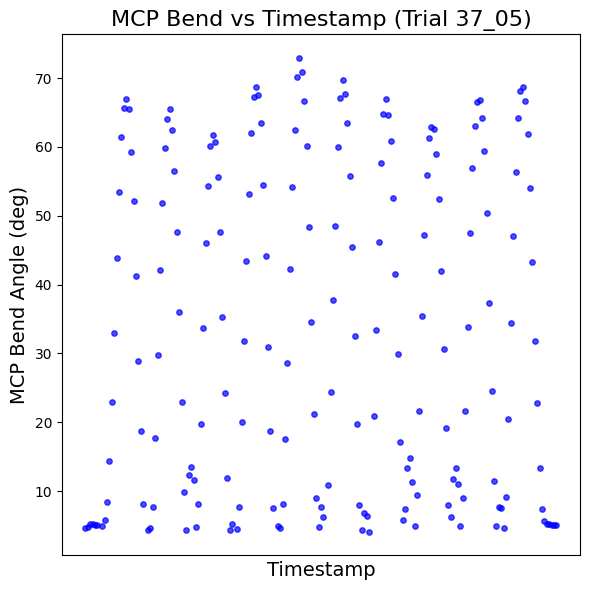

In [103]:
# Plot MCP Bend Angles Calculated from Camera Data vs Camera Timestamp
plt.figure(figsize=(6,6))
plt.scatter(
    cam.df[("ts_25183199", "", "")], 
    cam.df[("metric", "mcp_bend_deg", "deg")],
    s=15, alpha=0.7, color="blue"  # set dots to blue
)

plt.xlabel("Timestamp", fontsize=14)  # bigger label font
plt.ylabel("MCP Bend Angle (deg)", fontsize=14)

plt.title(f"MCP Bend vs Timestamp (Trial {trial_string})", fontsize=16)  # bigger title font

# Remove x ticks completely
plt.xticks([])

plt.tight_layout()
plt.savefig("MCP Bend vs timestamp.png", dpi=300, bbox_inches='tight')
plt.show()


In [104]:
df_renc.head()

,timestamp,raw,volts,angle
0,183711116203,14684,2.753250,2.635825
1,183711140863,14717,2.759438,3.016796
2,183711163313,14691,2.754563,2.716637
3,183711188072,14690,2.754375,2.705092
4,183711212366,14715,2.759063,2.993707


In [105]:
cam.df[("ts_25183199", "", "")]

0      183711125116
1      183711173552
2      183711226773
3      183711277172
4      183711324910
           ...     
194    183720904685
195    183720951743
196    183721012779
197    183721052240
198    183721105458
Name: (ts_25183199, , ), Length: 199, dtype: object

In [106]:
df_renc["timestamp"]

0      183711116203
1      183711140863
2      183711163313
3      183711188072
4      183711212366
           ...     
435    183721011690
436    183721033034
437    183721057496
438    183721079570
439    183721103034
Name: timestamp, Length: 440, dtype: int64

## Align Timestamps 

In [107]:
cam.find_matching_indices(
    encoder_df=df_renc,
    cam_time_col=("ts_25183199", "", ""),  # or "ts_25183199"
    enc_time_col="timestamp",

    #--------------- set a timestamp difference threshold here ------------------
    
    tolerance="1000ms",     # <-- was 10000; use an explicit window for clarity

    #--------------- set a timestamp difference threshold here ------------------
    
    direction="nearest",
)

cam.attach_encoder_using_match(
    encoder_df=df_renc,
    columns=None,
    suffix="_renc",
    keep_time_delta=True,
    drop_unmatched=True,
)


[find_matching_indices] Dropping 0 camera rows with NaT timestamps.
[find_matching_indices] Dropping 0 encoder rows with NaT timestamps.
[debug] cam range: 0 days 18:37:11.125116 → 0 days 18:37:21.105458
[debug] enc range: 0 days 18:37:11.116203 → 0 days 18:37:21.103034
[debug] probe |delta| (ms) stats: count    23.000000
mean      4.946000
std       3.618171
min       0.349000
25%       1.964000
50%       3.287000
75%       8.547000
max      11.453000
Name: delta_ms, dtype: float64


/Users/phily/Developer/sensorimotor-lab/Strain-Sensor-/Code/analysis/analysis.py:248: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  cam_small["_t_cam_ns"] = cam_small["t_cam_td"].view("i8")
/Users/phily/Developer/sensorimotor-lab/Strain-Sensor-/Code/analysis/analysis.py:249: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  enc_small["_t_enc_ns"] = enc_small["t_enc_td"].view("i8")


,"(scorer, bodyparts, coords)","(DLC_3D, PIP, x)","(DLC_3D, PIP, y)","(DLC_3D, PIP, z)","(DLC_3D, MCP, x)","(DLC_3D, MCP, y)","(DLC_3D, MCP, z)","(DLC_3D, hand, x)","(DLC_3D, hand, y)","(DLC_3D, hand, z)",...,"(DLC_3D, forearm, z)","(ts_25183199, , )","(ts_25185174, , )","(metric, mcp_bend_deg, deg)","(metric, wrist_bend_deg, deg)",timestamp_renc,raw_renc,volts_renc,angle_renc,time_delta_renc
0,0,NaN,NaN,NaN,-14.211303,-25.045929,223.089256,-1.135550,-19.686764,227.539939,...,231.295143,183711125116,183711132531,NaN,16.710271,183711116203,14684,2.753250,2.635825,-8.913
1,1,NaN,NaN,NaN,-14.264890,-25.083250,223.105640,-1.216009,-19.760697,227.525510,...,231.266235,183711173552,183711184545,NaN,16.679636,183711163313,14691,2.754563,2.716637,-10.239
2,2,-56.100966,-38.319792,208.041883,-14.097394,-24.976217,223.136606,-0.983569,-19.608980,227.569830,...,231.380785,183711226773,183711236200,4.663110,16.648860,183711236999,14709,2.757938,2.924439,10.226
3,3,-56.106383,-38.250417,208.044584,-14.090106,-24.976376,223.091225,-0.959067,-19.578975,227.509524,...,231.506675,183711277172,183711286935,4.835334,16.487172,183711281814,14717,2.759438,3.016796,4.642
4,4,-56.089190,-38.149814,208.139745,-14.087946,-25.030933,223.018604,-0.931776,-19.523596,227.528141,...,231.524754,183711324910,183711332506,5.227449,16.880844,183711327690,14699,2.756063,2.808993,2.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,194,-57.290142,-39.759564,208.494445,-15.360416,-26.125422,223.048980,-2.322257,-20.477405,227.456798,...,230.255419,183720904685,183720914406,5.253924,17.426409,183720895353,14700,2.756250,2.820538,-9.332
195,195,-57.344342,-39.806411,208.596606,-15.438878,-26.199116,223.063828,-2.400470,-20.542915,227.501365,...,230.186706,183720951743,183720959919,5.268915,17.636108,183720962731,14715,2.759063,2.993707,10.988
196,196,-57.295183,-39.930109,208.374085,-15.392524,-26.230686,222.982048,-2.379879,-20.617186,227.371424,...,230.290732,183721012779,183721020263,5.105827,17.300952,183721011690,14728,2.761500,3.143787,-1.089
197,197,-57.221892,-39.682812,208.506042,-15.303029,-25.978801,223.132879,-2.255357,-20.385384,227.438814,...,230.363461,183721052240,183721059501,5.080340,16.929358,183721057496,14710,2.758125,2.935984,5.256


In [108]:
# Create a smaller dataframe keeping only columns for following:

cols_to_keep = [
    "angle_renc",   
    ("metric", "mcp_bend_deg", "deg"),
    ("metric", "wrist_bend_deg", "deg"),
    "time_delta_renc",  # time difference between camera and rot enc timestamps
]
small_df = cam.df[cols_to_keep].copy()
small_df = small_df.dropna(subset=[("metric", "mcp_bend_deg", "deg")])
small_df = small_df.loc[:, ~small_df.columns.duplicated()].copy()


In [109]:
# Count how many remaining datapoints left  in MCP Bend Angle  after NaN removal from timestamped matched dataframe 

# Count NaNs
remain = len(small_df)

# Count total rows
total_rows = len(cam.df)

# Print results
print(f"Rows after timestamp matching: {total_rows} rows")
print(f"Rows after dropping NaN's in MCP Bend Angle: {remain} rows")

Rows after timestamp matching: 199 rows
Rows after dropping NaN's in MCP Bend Angle: 191 rows


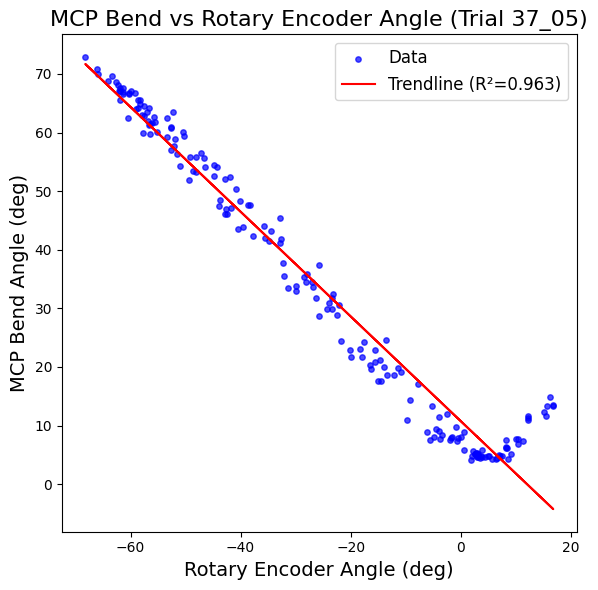

In [110]:
x = small_df["angle_renc"].to_numpy()
y = small_df[("metric", "mcp_bend_deg", "deg")].to_numpy()

# Fit linear regression (y = m*x + b)
m, b = np.polyfit(x, y, 1)
y_pred = m * x + b

# Compute R²
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(x, y, s=15, alpha=0.7, color="blue", label="Data")  # blue dots
plt.plot(x, y_pred, color="red", label=f"Trendline (R²={r2:.3f})")

plt.xlabel("Rotary Encoder Angle (deg)", fontsize=14)  # bigger labels
plt.ylabel("MCP Bend Angle (deg)", fontsize=14)
plt.title(f"MCP Bend vs Rotary Encoder Angle (Trial {trial_string})", fontsize=16)

plt.grid(False)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig("MCP Bend vs rot enc.png", dpi=300, bbox_inches='tight')
plt.show()
